In [97]:
from __future__ import print_function
from pixell import enmap,utils, reproject, enplot
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import os,sys
import urllib.request
from scipy import interpolate
import math
import pandas as pd
import csv
import yaml
import h5py
from scipy.stats import norm
import matplotlib.patheffects as path_effects
import pickle as pk
from matplotlib.ticker import Locator

from astropy import wcs
from astropy.coordinates import SkyCoord  # High-level coordinates
from astropy.coordinates import ICRS, Galactic, FK4, FK5  # Low-level frames
from astropy.coordinates import Angle, Latitude, Longitude  # Angles
import astropy.units as u
from astropy.io import fits
from astropy.table import QTable


%matplotlib inline

In [54]:
def tnoStamp(ra, dec, kmap, frhs, width = 0.5):
    
    coords = np.deg2rad(np.array((dec,ra)))
    ypix,xpix = enmap.sky2pix(kmap.shape,kmap.wcs,coords)
    
    kstamp = reproject.postage_stamp(kmap,ra, dec, 1., 0.5)
    print(np.mean(kstamp))
    
    tile = frhs/np.sqrt(kmap)
    for row in tile:
        for i in range(len(row)):
            if math.isnan(row[i]):
                row[i] = 0
    
    stamp = reproject.postage_stamp(tile, ra, dec, width*60, 0.5)
    
    return stamp

In [133]:
def tnoStacker(mdjs, ras, decs):
    path = '/home/r/rbond/sigurdkn/scratch/actpol/planet9/20200801/maps/combined/'
    for dirname in os.listdir(path):
        hdu = fits.open(path + dirname + '/kmap.fits')
        w = wcs.WCS(hdu[0].header)
        for i in range(len(ras)):
            c = SkyCoord(ras[i], decs[i], unit="deg")
            x, y = w.world_to_pixel(c)

            #kmap = enmap.read_map(path + dirname + '/kmap.fits')
            #frhs = enmap.read_map(path + dirname + '/frhs.fits')

            if (0 <= x <= hdu[0].data.shape[0]) and (0 <= y <= kmap[0].data.shape[1]):
                print('True')
        

In [134]:
mdcw_catalog = fits.open('/home/s/sievers/sdicker/ACTnCOWs/MADCOWSUnion.fits')




ra = mdcw_catalog[1].data['RADeg']
dec = mdcw_catalog[1].data['decDeg']
ra, dec = np.array(ra), np.array(dec)

tnoStacker([], ra, dec)

True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


KeyboardInterrupt: 

/home/r/rbond/jorlo/actmadcows/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.


0.05600497


/home/r/rbond/jorlo/actmadcows/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':


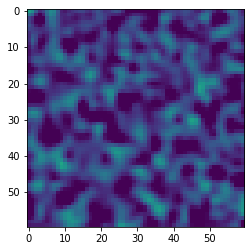

In [55]:
kmap = enmap.read_map('/home/r/rbond/sigurdkn/scratch/actpol/planet9/20200801/maps/combined/s13_deep5_1385164800/kmap.fits')
frhs = enmap.read_map('/home/r/rbond/sigurdkn/scratch/actpol/planet9/20200801/maps/combined/s13_deep5_1385164800/frhs.fits')

tile = frhs/np.sqrt(kmap)
for row in tile:
    for i in range(len(row)):
        if math.isnan(row[i]):
            row[i] = 0


center = np.where((tile == np.amax(tile)))

ra, dec = enmap.pix2sky(kmap.shape,kmap.wcs,center)


stamp = tnoStamp( 1, 2, kmap, frhs)
plt.imshow(stamp[0], vmin = -1, vmax = 5)
plt.show()

In [10]:
path = '/home/r/rbond/sigurdkn/scratch/actpol/planet9/20200801/maps/combined/'

mjds = []

for folder in os.listdir(path):
    with h5py.File(path + str(folder)+"/info.hdf", "r") as hfile:
        mjd = hfile["mjd"][()]
    mjds.append(mjd)
    
pk.dump( mjds, open( "mjds.p", "wb" ) )

In [58]:
hdu = fits.open('/project/r/rbond/jorlo/tno_obs.fits')

In [62]:
hdu[1].header

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                   73 / length of dimension 1                          
NAXIS2  =               807696 / length of dimension 2                          
PCOUNT  =                    0 / number of group parameters                     
GCOUNT  =                    1 / number of groups                               
TFIELDS =                    6 / number of table fields                         
TTYPE1  = 'targetname'                                                          
TFORM1  = '24A     '                                                            
TUNIT1  = '---     '                                                            
TTYPE2  = 'RA      '                                                            
TFORM2  = 'D       '        

In [73]:
jd = hdu[1].data['datetime_jd']
print(len(jd))

807696


In [64]:
path = '/home/r/rbond/sigurdkn/scratch/actpol/planet9/20200801/maps/combined/'

mjds = []

for folder in os.listdir(path):
    with h5py.File(path + str(folder)+"/info.hdf", "r") as hfile:
        mjd = hfile["mjd"][()]
        print(mjd)

58375.41006159657
58438.4891362633
57226.69783833906
57202.16600976634
57682.293462875394
57286.48467017138
57382.97483769693
58606.52617594686
56599.59278250163
57340.22055582489
56646.933312341986
57250.29226087263
57235.690056558895
57247.677143029614
58693.45712282826
56581.96983189235
57242.23701715888
57289.779743811014
56566.733519510395
57173.043048024294
56547.99435368786
57718.84898481472
56602.61309087837
56647.046619
58788.3644493581
57622.86205180257
57331.67758164482
57706.2453340236
57308.001911959196
57181.7995475199
58246.46727990333
57698.04443549321
58459.48741490455
58660.71291832909
56614.20018148666
56611.56627121124
57659.283758256315
57004.056369057434
57181.49738010443
58432.47584845816
57190.20678345431
58777.713792119415
57715.23065183423
56999.47955701126
56935.561404777014
57964.5160309562
56623.63060540975
57692.67677033613
57237.90714647707
57685.29577268864
56591.51020254864
58705.47121455651
57187.734637980764
56976.72297299386
57202.23367270347
57334.7

57362.16712380248
58402.49810432172
58248.4050361372
57542.21230126633
57223.80184854511
58119.640402174606
58384.50251603078
57533.41824493016
58441.49848896152
57212.49587504297
56572.32035206809
58072.962269540556
57715.92148883532
56960.00205804136
57235.39158743676
57289.92293094551
57744.335209985846
57292.40553623311
57283.70062056501
57679.732868738014
57673.826314028345
56617.641851962006
57355.39976592025
56905.897312784
57350.051604269756
58762.76768919487
56584.27031090626
57355.35766572476
58684.5285516591
57358.539303370635
58675.486069999664
56551.10704952372
57232.50794391342
56633.08027308312
58414.73956544741
56968.868438399084
57229.37807571248
57145.77033062564
57178.91864902433
57687.672746461525
58126.243905766256
57533.93094208068
57346.438619421395
58372.61756241674
58378.489483829275
57310.25508643886
57539.16512402849
57237.654521725366
56599.802287014376
58264.98967472778
56593.23584535798
57232.60913729433
58818.687997731264
56581.6357413614
57010.4782933398

In [74]:
kmap = fits.open('/home/r/rbond/sigurdkn/scratch/actpol/planet9/20200801/maps/combined/s13_deep5_1385164800/kmap.fits')


In [89]:
w = wcs.WCS(kmap[0].header)
print(kmap[0].data.shape)

(836, 1956)


In [95]:
print(w.pixel_to_world(0, 0))
print(w.pixel_to_world(kmap[0].data.shape[0], kmap[0].data.shape[1]))


<SkyCoord (ICRS): (ra, dec) in deg
    (13.44583333, -7.1625)>
<SkyCoord (ICRS): (ra, dec) in deg
    (359.5125, 25.4375)>


In [122]:

else:
    print('False')

True
